<a href="https://colab.research.google.com/github/aluqbnle/ml-sandbox/blob/master/15_Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 混合行列

## データの準備

In [0]:
from pandas import DataFrame
from sklearn.datasets import load_breast_cancer

In [0]:
breast_cancer=load_breast_cancer()
X=breast_cancer.data[:,:10]
y=breast_cancer.target

columns=['radius','texture','Circumference','area','smoothness','compactness','dent','number_of_dent','Symmetry','fractal dimension']

df=DataFrame(data=X[:,:10],columns=columns)
df['objective_values']=y

In [0]:
X=df[['area','dent']].values
y=df['objective_values'].values

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [0]:
from sklearn.preprocessing import StandardScaler

In [7]:
# StandardScalerのインスタンスを作成する
sc = StandardScaler()
# 訓練データの平均と標準偏差を計算する
sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
# 訓練データの標準化
X_train_std = sc.transform(X_train)

# テストデータの標準化
# テストデータは訓練データの平均と標準偏差を用いて変換する
X_test_std = sc.transform(X_test)

## ランダムフォレストの学習と予測

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
rf = RandomForestClassifier(criterion='gini',max_depth=1,n_estimators=10,random_state=42)

In [13]:
rf.fit(X_train_std,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [14]:
# テストデータの予測
pred = rf.predict(X_test_std)
# 予測の確認
print(pred)

[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 0 0 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 0 0 1 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 0 0 1 1 1 0 1 0 1 1 1 1 0 0
 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1]


## 混合行列の計算

In [0]:
from sklearn.metrics import confusion_matrix

In [17]:
confmat = confusion_matrix(y_true=y_test,y_pred=pred)
print(confmat)

[[ 58   5]
 [  3 105]]


## 混合行列の可視化

In [0]:
import numpy 
from matplotlib import pyplot
#pyplot.rcParams
from mlxtend.plotting import plot_confusion_matrix

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe44ba23390>)

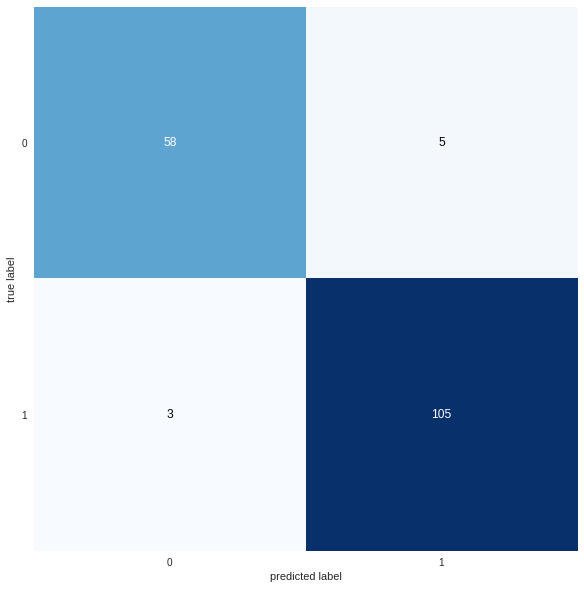

In [19]:
plot_confusion_matrix(conf_mat=confmat,figsize=(10,10))

## 様々な評価指標
### 正解率

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.9532163742690059

### 誤分類率

In [27]:
ac = accuracy_score(y_test,pred)
print(1-ac)

0.04678362573099415


### 適合率

In [21]:
from sklearn.metrics import precision_score
precision_score(y_test, pred)

0.9545454545454546

### 再現率

In [22]:
from sklearn.metrics import recall_score
recall_score(y_test, pred)

0.9722222222222222

### F1スコア

In [29]:
from sklearn.metrics import f1_score
f1_score(y_test,pred)

0.963302752293578